Reference
=========



## Intro



[Py5canvas](https://github.com/colormotor/py5canvas/) is a Python &ldquo;flavour&rdquo; of Processing. It is designed to work inside Jupyter notebooks or in the form of interactive sketches. The syntax of this framework is designed to be very similar to it&rsquo;s cousins [Processing](https://processing.org) (in [Java](https://en.wikipedia.org/wiki/Java_(programming_language))) and [P5js](https://p5js.org) (in Javascript). As a result, Processing/P5js documentation and tutorials should remain useful references and the relevant examples should be easy to adapt to their Python counterparts.

Apart from the essential language differences (e.g. comments in Python are preceded by `#` as opposed to `//` as in Java/Javascript), the main difference between Py5canvas and either P5js or Processing is that it uses the [&ldquo;snake<sub>case</sub>&rdquo;](https://en.wikipedia.org/wiki/Snake_case) naming convention as opposed to [&ldquo;CamelCase&rdquo;](https://en.wikipedia.org/wiki/Camel_case). This is pretty much the standard in Python code, meaning that function and variable names generally use English words separated by underscores rather than capitalization. As an example, the P5js function `createCanvas` will be `create_canvas` in py5canvas.

With Py5Canvas being a recently developed project, the documentation is still under construction and lacks examples for all functionality. For the time being, it is useful to also refer to the more extensive documentation/tutorials for [Processing](https://processing.org) and [P5js](https://p5js.org), while keeping in mind the syntax switch from camel case to snake case. E.g. Processing&rsquo;s [beginContour](https://processing.org/reference/beginContour_.html) function will become `begin_contour` but the information in the processing reference remains generally valid for the Python case.

Another useful source of documentation is the more mature Python port of Processing [p5py](https://p5.readthedocs.io/en/latest/), which has an almost identical syntax to Py5canvas. While p5py is a extensive port of all the Processing functionalities, it does not currently support features such as Jupyter notebooks, live-reloading of sketches, vector graphics exporting, parameter saving and an interactive UI. At the same time, it has a better high-level support for interactive 3d graphics, so you should probably use that if that is your goal.



## Basics (in a Jupyter notebook)



The py5canvas module allows to use commands similar to Processing or p5js in a Jupyter notebook. Similarly to processing, this works by &ldquo;injecting&rdquo; code into the current context, which gives access to commands that would be usually require a more complex syntax.

To use py5canvas in a notebook import it and create a canvas as follows:



In [1]:
from py5canvas import *
create_canvas(400, 400)

Here we created a canvas with size `(512, 512)`. When created the canvas will be empty, we can draw an ellipse and show it below a code cell with:



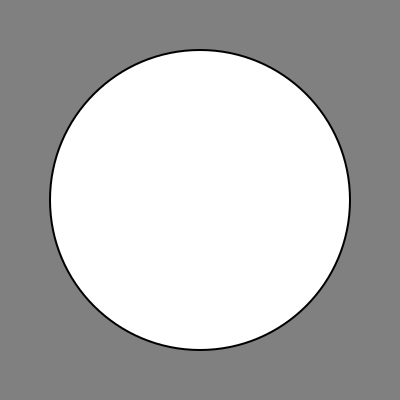

In [2]:
ellipse (200, 200, 300, 300)
show()

The `ellipse` line tells the program to draw an ellipse centered at 50 pixels from the left and 50 pixels from the top, with a width and height of 300 pixels. The `show()` function displays the canvas under the current code shell.

We can clear the canvas background with a given color using `background(...)`. E.g:



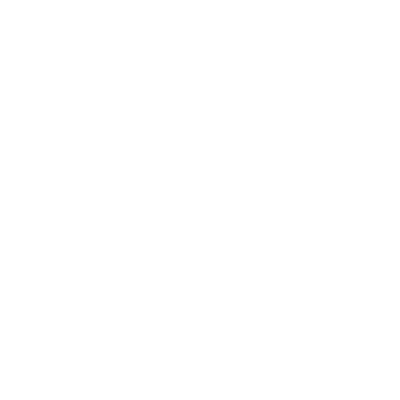

In [3]:
background(255)
show()

The way in which we specify colors is flexible, by providing a single value to the `background` function we specify a grayscale value. Three values can be used to specify the RGB components of a color. By default the range of values is between `0` and `255`.



### Persistence



Because of how Python notebooks are structured, once a canvas is created in one code cell using `create_canvas`, it will remain persistent in the following cells. For example, we already cleared the background of the current canvas to white, and can now add a line to it and display. Try re-executing the cell multiple times and you will see lines accumulating.



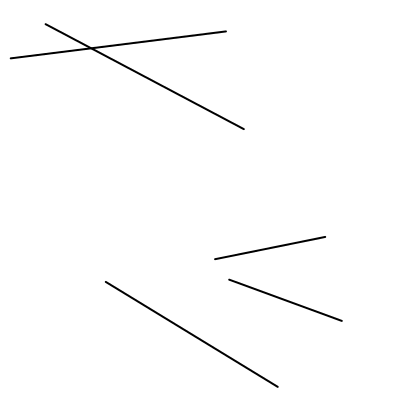

In [8]:
line(random(0, width), random(0, height),
     random(0, width), random(0, height))
show()

Note that here we use the `width` and `height` properties to retrieve the width and height of the canvas. We also use the `random` function that returns a random number between the first and the second argument.



### Shapes and styles



Let&rsquo;s use the same canvas to add a line of a different color, say red.



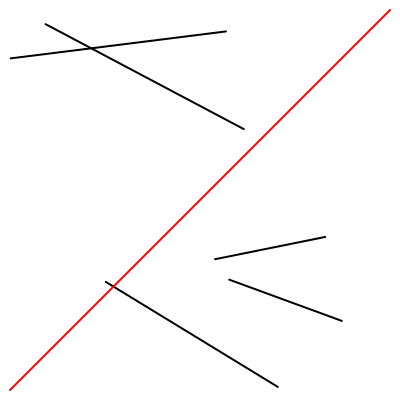

In [9]:
stroke(255, 0, 0)
line(width - 10, 10, 10, height - 10)
show()

The `stroke` function sets the color of the current stroke. It can be used in multiple ways depending on the arguments:



In [10]:
stroke(255)                # sets the stroke color to white
stroke(255, 255, 255)      # identical to the line above
stroke(255, 128, 0)        # bright orange (red 255,green 128, blue 0)
stroke("#FF8000")          # bright orange as a web color (string)
stroke(255, 128, 0, 128)   # bright orange with 50% transparency

Try replacing the `stroke` call before the one above and see how this works. A similar procedure can be used to set the current fill color using `fill`



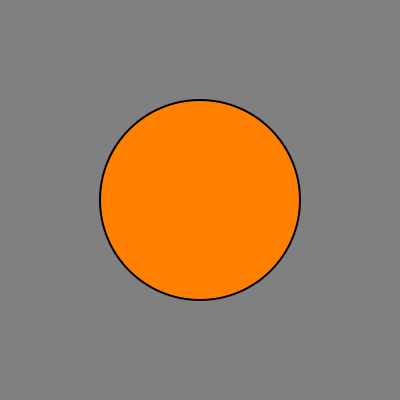

In [11]:
background(128)
stroke(0)
fill("#FF8000")
circle(width/2, height/2, 100)
show()

Shapes can also be only outlined or only stroked. To do this, you can use the `no_stroke()` and `no_fill()` functions to eliminate the stroke and fill respectively:



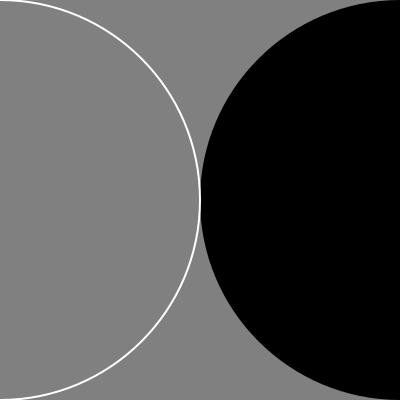

In [12]:
background(128)
no_stroke()
fill(0)
circle(width, height/2, 200)
stroke(255)
no_fill()
circle(0, height/2, 200)
show()

### Text



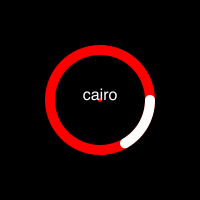

In [13]:
import py5canvas
from py5canvas import canvas
reload(canvas)
reload(py5canvas)
from py5canvas import *
create_canvas(200,200)
background(0)
color_mode('RGB', 255)
fill(255, 0, 0)
circle(width/2, height/2, 3)
fill(255)
#
text('cairo', [width/2, height/2], align='center', valign='bottom')
stroke(255)
no_fill()

stroke_weight(10)
stroke(255, 0, 0)
circle(width/2, height/2, 50)
stroke(255)
arc(width/2, height/2, 100, 100, radians(0), radians(60))

show()

### Learning from Processing



Many functionalities in Py5canvas are very similar to its Java and Javascript counterparts, so many existing tutorials can be easily adapted by keeping in mind the &ldquo;camel<sub>case</sub>&rdquo; trick and the syntax differences between languages.



#### Color handling



For learning about color handling, you can look at [this Processing tutorial](https://processing.org/tutorials/color) by Daniel Shiffman as a reference. We can for copy one of his examples from the tutorial in a cell, and the convert the comments to Python syntax (using `#`), convert some functions to camel case and finally add a `show()` at the end to visualze:



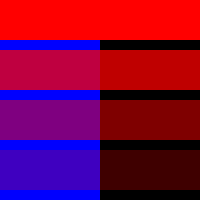

In [15]:
from importlib import reload
from py5canvas import notebook, canvas
reload(canvas)
reload(notebook)
from py5canvas.notebook import *

size(200,200);
background(0);
no_stroke();

# No fourth argument means 100% opacity.
fill(0,0,255);
rect(0,0,100,200);

# 255 means 100% opacity.
fill(255,0,0,255);
rect(0,0,200,40);

# 75% opacity.
fill(255,0,0,191);
rect(0,50,200,40);

# 55% opacity.
fill(255,0,0,127);
rect(0,100,200,40);

# 25% opacity.
fill(255,0,0,63);
rect(0,150,200,40);
show()

Note that, if we are lazy, we can leave semicolons in the code. These are only used in Python to separate between code statements in the same line.



#### Coordinate System and Shapes



Another basic but useful tutorial by Shiffman is one on [coordinate systems and shapes](https://processing.org/tutorials/coordinatesystemandshapes). Again we can easily adapt the code with little modification:



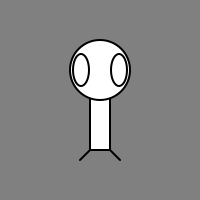

In [16]:
size(200,200);
rect_mode(CENTER);
rect(100,100,20,100);
ellipse(100,70,60,60);
ellipse(81,70,16,32);
ellipse(119,70,16,32);
line(90,150,80,160);
line(110,150,120,160);
show()

## Interactive sketches
Coming soon...
